In [ ]:
!pip install praw

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Hot_posts = reddit.subreddit('india').hot(limit=15000)
New_posts = reddit.subreddit('india').new(limit=15000)
Top_posts = reddit.subreddit('india').top(limit=500)
list = [Hot_posts, New_posts, Top_posts]

In [ ]:
flairs = ['AskIndia','Non-Political','Scheduled','Photography','Science/Technology','Politics',
          'Business/Finance','Policy/Economy','Sports','Food']

In [ ]:
data = []
for X_posts in list:
    count=0
    for post in X_posts:
        topcomments = []
        if count==500:
            break
        # make sure that the flair belongs to our list
        if post.link_flair_text in flairs:
            #from the comment forest we only need the top comment and not sub comments
            post.comments.replace_more(limit=0)
            no_c = 0
            for comment in post.comments:
                if no_c==10:
                    break
                topcomments.append(comment.body)
                no_c=no_c+1
            data.append([post.link_flair_text,post.id,post.title,post.selftext,post.url,topcomments])
            count=count+1

In [ ]:
df = pd.DataFrame(data,columns=['Flair','ID','Title','Body','URL','Comments'])

In [ ]:
r, c = df.shape
print(r,c)

1428 6


In [ ]:
#no of unique IDs - there is repetion from hot and new posts both
df.ID.nunique(dropna = True) 

947

In [ ]:
df.drop_duplicates(subset=['ID'],keep='first', inplace=True)

In [ ]:
df.shape

(947, 7)

In [ ]:
df

,Flair,ID,Title,Body,URL,Comments
0,Scheduled,g4d2ix,"[Monthly Happiness Thread] Randians, please sh...",<3 \n \nLinks: ...,https://www.reddit.com/r/india/comments/g4d2ix...,[Working from home since past one month. For s...
1,Politics,g6gbol,Mumbai Police Meri Jaan,,https://i.redd.it/8gk6e582xhu41.jpg,[You criticise jumlabaazis/corruption/high han...
2,Politics,g6ljfk,Two lenses,,https://i.redd.it/xwabo3m67ku41.jpg,"[They don't have to find hatred, they give bir..."
3,Politics,g6n39a,Arnab Goswami’s video alleging attack doesn’t ...,,https://www.altnews.in/arnab-goswamis-video-st...,"[Great work Altnews👍🏻, Alt news seriously is a..."
4,Non-Political,g6ocd8,Be responsible,,https://i.redd.it/9j1il1dl2lu41.jpg,[[Satish Acharya](https://twitter.com/satishac...
5,Politics,g6i59b,"Give Us Kerala Model Over Gujarat Model, Any D...",,https://www.ndtv.com/opinion/give-us-kerala-mo...,[How about giving each state its own unique mo...
6,Non-Political,g6ove1,‘Lives in Our Hearts’: Kashmiris Mourn Khalsa ...,,https://www.thequint.com/news/india/inderjeet-...,"[> Khalsa Aid worker Inderjeet Singh, who was ..."
7,Politics,g6gz0e,Arnab Goswami alleges physical assault by Cong...,,https://www.theweek.in/news/india/2020/04/23/a...,[I have a better theory. Who has a lot of mone...
8,Politics,g6m54v,Stop watching PRIME TIME!,,https://i.redd.it/rrgizaiveku41.jpg,"[Ironic that their sister venture, does exactl..."
9,Politics,g6ivnl,"As the world looks for coronavirus scapegoats,...",,https://www.washingtonpost.com/world/asia_paci...,"[In times of a pandemic, a blame game between ..."


In [ ]:
F_count = pd.Series(df['Flair'].value_counts())

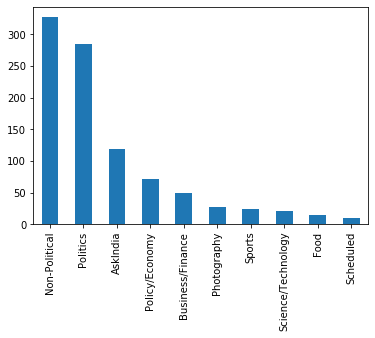

In [ ]:
F_count.plot.bar()
#x = plt.bar(F_count.index,F_count.values, align='center', alpha=0.9)
#plt.ylabel('No of posts in flair')
#plt.title('Flair distribution across dataset')
#plt.show()

In [ ]:
x = df[df['Body']==''] #729 rows don't have content in body
x.shape

(729, 6)

In [ ]:
df.head()

,Flair,ID,Title,Body,URL,Comments
0,Scheduled,g4d2ix,"[Monthly Happiness Thread] Randians, please sh...",<3 \n \nLinks: ...,https://www.reddit.com/r/india/comments/g4d2ix...,[Working from home since past one month. For s...
1,Politics,g6gbol,Mumbai Police Meri Jaan,,https://i.redd.it/8gk6e582xhu41.jpg,[You criticise jumlabaazis/corruption/high han...
2,Politics,g6ljfk,Two lenses,,https://i.redd.it/xwabo3m67ku41.jpg,"[They don't have to find hatred, they give bir..."
3,Politics,g6n39a,Arnab Goswami’s video alleging attack doesn’t ...,,https://www.altnews.in/arnab-goswamis-video-st...,"[Great work Altnews👍🏻, Alt news seriously is a..."
4,Non-Political,g6ocd8,Be responsible,,https://i.redd.it/9j1il1dl2lu41.jpg,[[Satish Acharya](https://twitter.com/satishac...


In [ ]:
df.columns

Index(['Flair', 'ID', 'Title', 'Body', 'URL', 'Comments'], dtype='object')

In [ ]:
df.to_csv('finalflaredata.csv')

In [ ]:
print(df['Comments'])

0       [Working from home since past one month. For s...
1       [You criticise jumlabaazis/corruption/high han...
2       [They don't have to find hatred, they give bir...
3       [Great work Altnews👍🏻, Alt news seriously is a...
4       [[Satish Acharya](https://twitter.com/satishac...
                              ...                        
1422    [Please add the source when sharing images. Th...
1423    [You get conditioned to neglect his presence a...
1425                                                 None
1426                                                 None
1427                                                 None
Name: Comments, Length: 947, dtype: object
